In [12]:
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Set ggplot style

In [13]:
plt.style.use('ggplot')

Establish database connection

In [14]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=DESKTOP-GPPFVD7\SERVER1;'
                      'Database=AdventureWorks2019;'
                      'Trusted_Connection=yes;')

Define SQL query

In [15]:
query = 'SELECT E.VacationHours, S.Bonus FROM HumanResources.Employee E INNER JOIN Sales.SalesPerson S ON E.BusinessEntityID = S.BusinessEntityID'

Fetch data from SQL database

In [ ]:
employee_sales_data = pd.read_sql(query, conn)

Print the first few rows of the dataframe

In [17]:
print(employee_sales_data.head())

   VacationHours   Bonus
0             14     0.0
1             38  4100.0
2             27  2000.0
3             24  2500.0
4             33   500.0


Plot scatter plot

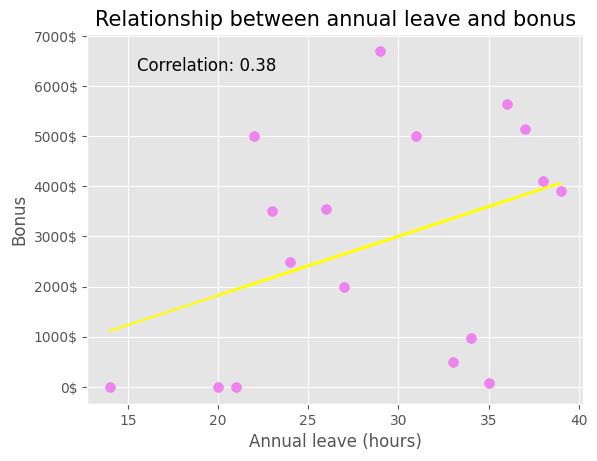

In [18]:
employee_sales_data.plot.scatter(x='VacationHours', y='Bonus', color='violet', s=50)
plt.title('Relationship between annual leave and bonus', fontsize=15)
plt.xlabel('Annual leave (hours)', fontsize=12)
plt.ylabel('Bonus', fontsize=12)
plt.yticks([0, 1000, 2000, 3000, 4000, 5000, 6000, 7000], ['0$', '1000$', '2000$', '3000$', '4000$', '5000$', '6000$', '7000$'])

# Calculate correlation coefficient
correlation = employee_sales_data['VacationHours'].corr(employee_sales_data['Bonus'])

# Annotate the scatter plot with the correlation coefficient
plt.annotate('Correlation: {:.2f}'.format(correlation), xy=(0.1, 0.9), xycoords='axes fraction', fontsize=12)

# Add a line of best fit
m, b = np.polyfit(employee_sales_data['VacationHours'], employee_sales_data['Bonus'], 1)
plt.plot(employee_sales_data['VacationHours'], m * employee_sales_data['VacationHours'] + b, color='yellow')

plt.show()